# Lab Four: Evaluation and Multi-Layer Perceptron

By Yifan Ding

# Business Understanding 

## Overview
This dataset is collected from Guangzhou Women and Children’s Medical Center, Guangzhou, and consists of X-ray images of children age 1-5, some of whom had bacterial or viral pneumonia.  The images are x-rays of the chest and have been labeled by two different doctors---with a third the tiebreaker if the two disagreed.  The original images are in different size, so we resized each image to 160x240 pixels jpeg and converted them into grayscale images.  The following graph is from the last page from the Cell Paper: "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning" shows the distinction between a normal lung, a lung with bacterial pneumonia, and a lung with viral pneumonia.
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia![image.png](attachment:image.png)

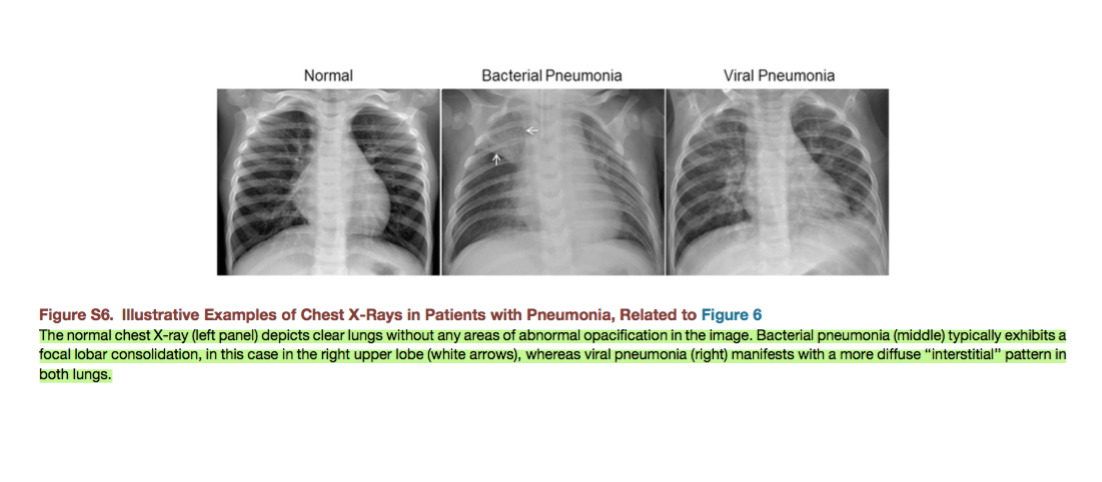

In [2]:
from IPython.display import Image
Image(filename = "/Users/xuechenli/Downloads/lessons/7324/lab2/Lung_Classification.png" )

## Purpose
The purpose of this dataset was to develop an artificial neural network that will be able to distinguish between children with pneumonia in order to assist doctors in making the right decision.  There are three different classifications: normal, pneumonia-bacterial, and pneumonia-viral.  The cell paper, "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning"'s focus is to use transfer learning which is a technique to train a neural network with a relatively small number of images, (Kermany 1122).  For us, our purpose will be to classify the aforementioned three types for a preliminary screening.  As such, the kids will still receive medial care and a second opinion from a doctor so the stakes are not quite as high for our algorithm.




## Prediction Task
There are three different classifications for our image data. The prediction task for this algorithm is to distinguish between children with a normal lung, a lung with bacterial pneumonia, and a lung with viral pneumonia.  This algorithm would be used by hospitals who have an x-ray machine and who serve children between the ages of 1-5.  Though this data was screened by Chinese children, it can probably be used for children of other nationalities as well.  

## Importance
According to the Cell Paper, data collected by the World Health organization shows that pneumonia kills approximately 2 million children under 5 years old every year (though most of these deaths occur in Southeast asia or Africa). (Kermany 1127)   Since chest x-rays are common and can be used to identify between kids with pneumonia and kids without pneumonia, x-rays were chosen as the method of choice.  If we could develop an accurate and quick classifier, it might be able to be used wherever x-rays are used.  If developed, such an algorithm could be used by nurses and would not require a doctor to analyze the chest x-ray images.  This technique would just save Doctors' time and, potentially, the children who are suffering from pneumonia.  Th algorithm would successfully screen kids with pneumonia and direct them to the needed medical care: antibiotics if the child had bacterial pneumonia, supportive care if the child had viral pneumonia, and discharge if the child does not have pneumonia.


## Desired Accuracy of Classifier

In order for our algorithm to be useful, it would have to be better than the neural net algorithm that has already been created using the same data in some way.  This could mean that our algorithm achieves a greater accuracy than their 93 % and that the area under the ROC curve for our algorithm is better than the area under the ROC curve, (Kermany 1127). The ROC curve is a way to measure the performance of the algorithm by graphing the true positive rate vs. the false positive rate.  The higher to the left the algorithm line is the better the algorithm is. The algorithm in the paper achieved the following ROC curve:   

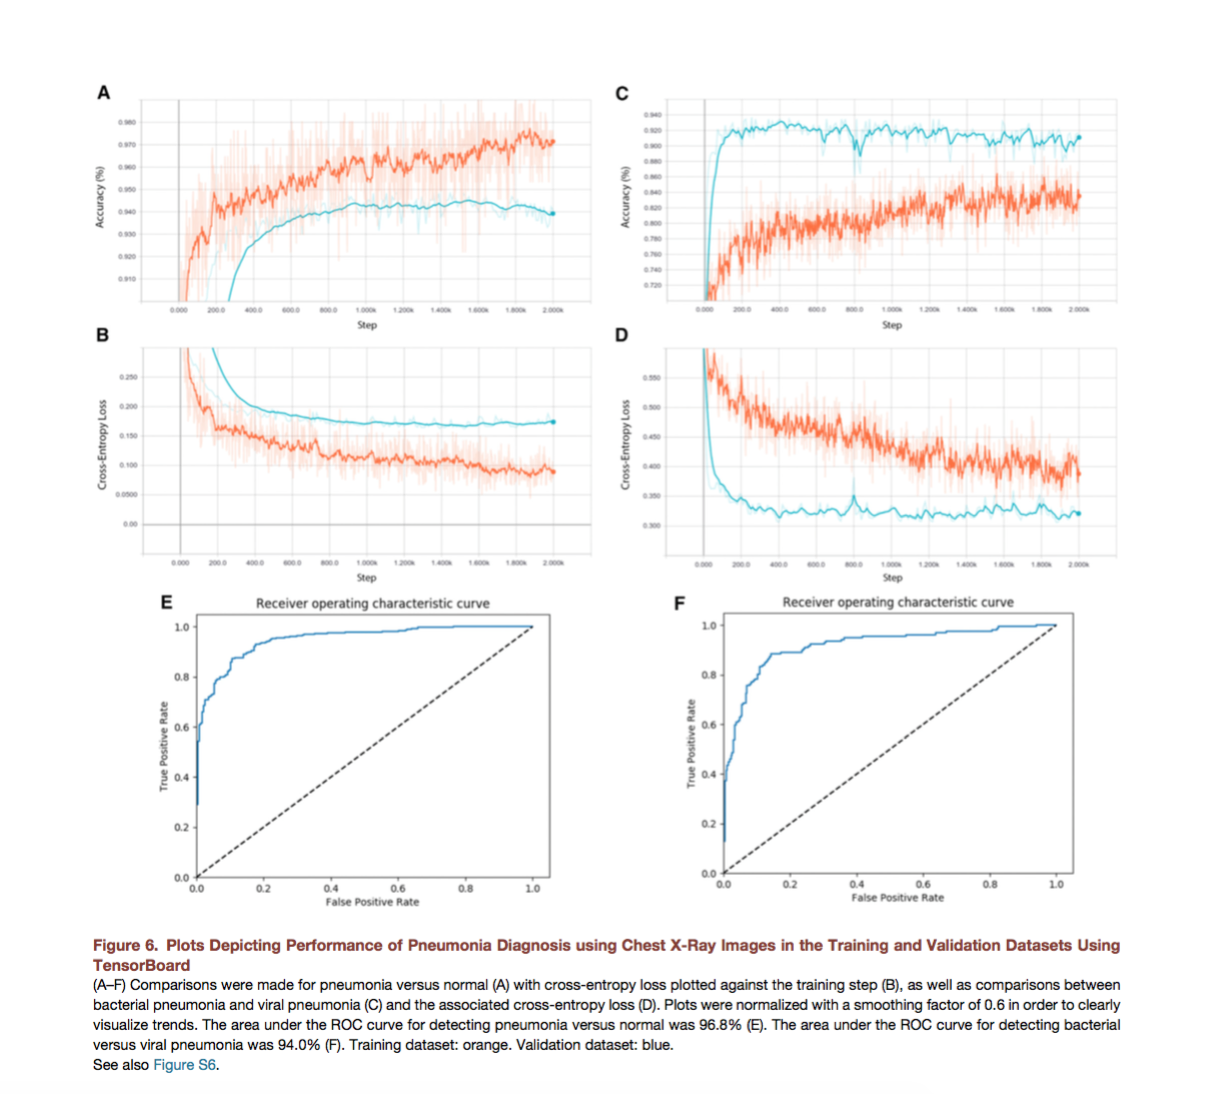

In [129]:
Image(filename = "/Users/xuechenli/Downloads/lessons/7324/lab2/ROC_Curve.png" )

## False Positive vs False Negative Trade-off
In all classification problems, it is important to consider which is worse: false positives or false negatives.  In this case, we will define a false positive as when the algorithm predicts that a child has pneumonia even when he or she doesn’t.  A false negative is when the classivier predicts that the child does not have pneumonia even when the child does.  In this case, it is clear that we want to limit the amount of false negatives and instead have more false positives.  If there is a false positive, all that will happen is that the child will go under more supervised care—if the child does not have pneumonia, this will probably be found with time.  If there is a false negative, though, the child will potentially leave the hospital even though he or she has pneumonia. Clearly, we will try to have more false positives than false negatives in this case.

# Citation for Business Understanding

Kermany, D., Goldbaum, M., Cai, W., Valentim, C., Liang, H., Baxter, S., McKeown, A., Yang, G., Wu, X., Yan, F., Dong, J., Prasadha, M., Pei, J., Ting, M., Zhu, J., Li, C., Hewett, S., Dong, J., Ziyar, I., Shi, A., Zhang, R., Zheng, L., Hou, R., Shi, W., Fu, X., Duan, Y., Huu, V., Wen, C., Zhang, E., Zhang, C., Li, O., Wang, X., Singer, M., Sun, X., Xu, J., Tafreshi, A., Lewis, M., Xia, H. and Zhang, K. (2018). Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell, 172(5), pp.1122-1131.e9.

Kaggle Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


# Data Preparation (10 points total)

## Import required modules

In [1]:
!pip install opencv-python
import numpy as np
import pandas as pd
import os, sys
import cv2 
from tqdm import tqdm 
import skimage
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

## Read image data from folder

In [2]:
folder1 = "/Users/yifan/Desktop/train/NORMAL/"
normal = [f for f in os.listdir(folder1) if os.path.isfile(os.path.join(folder1, f))]
folder2 = "/Users/yifan/Desktop/train/PNEUMONIA/"
pneumonia = [f for f in os.listdir(folder2) if os.path.isfile(os.path.join(folder2, f))]
folder = "/Users/yifan/Desktop/train/"
chest = normal + pneumonia
print("Working with {0} images".format(len(chest)))

Working with 5216 images


## Images examples

We displayed some images from both groups.

person322_bacteria_1494.jpeg


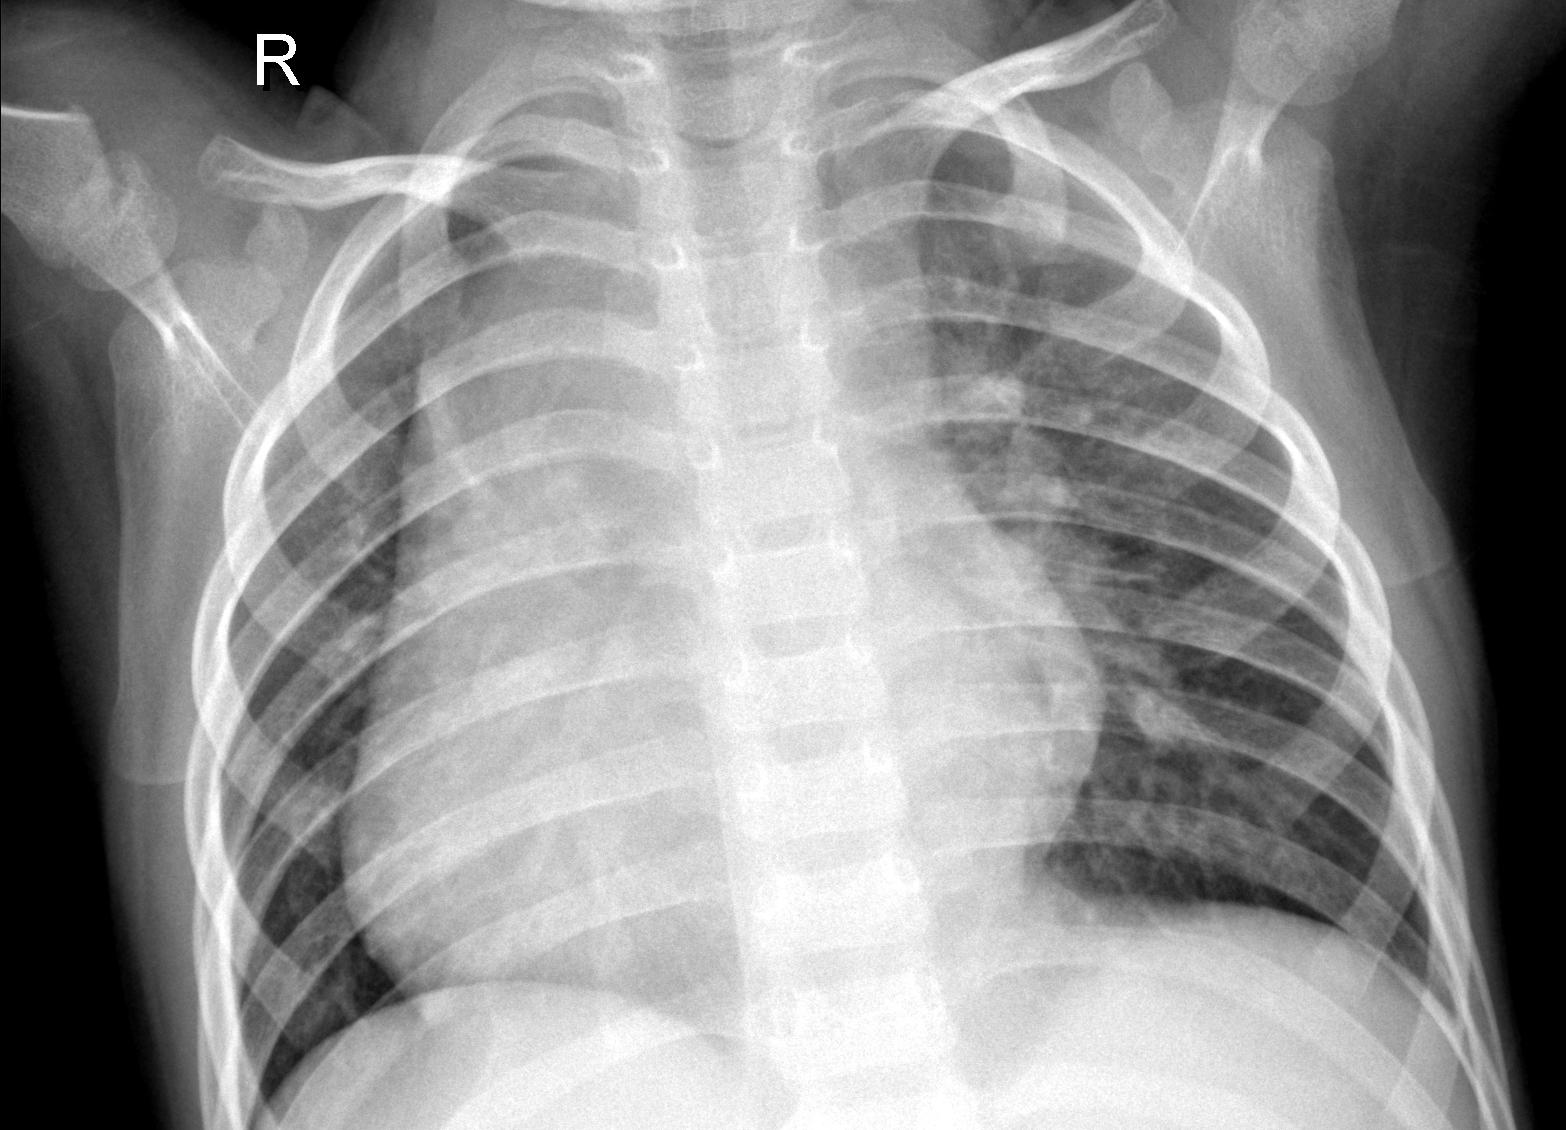

person507_bacteria_2141.jpeg


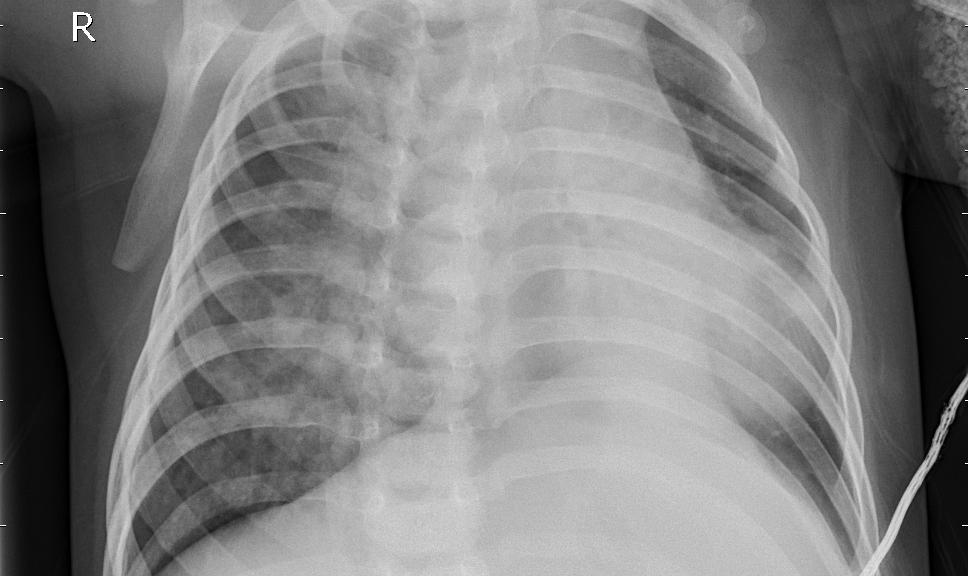

person855_bacteria_2777.jpeg


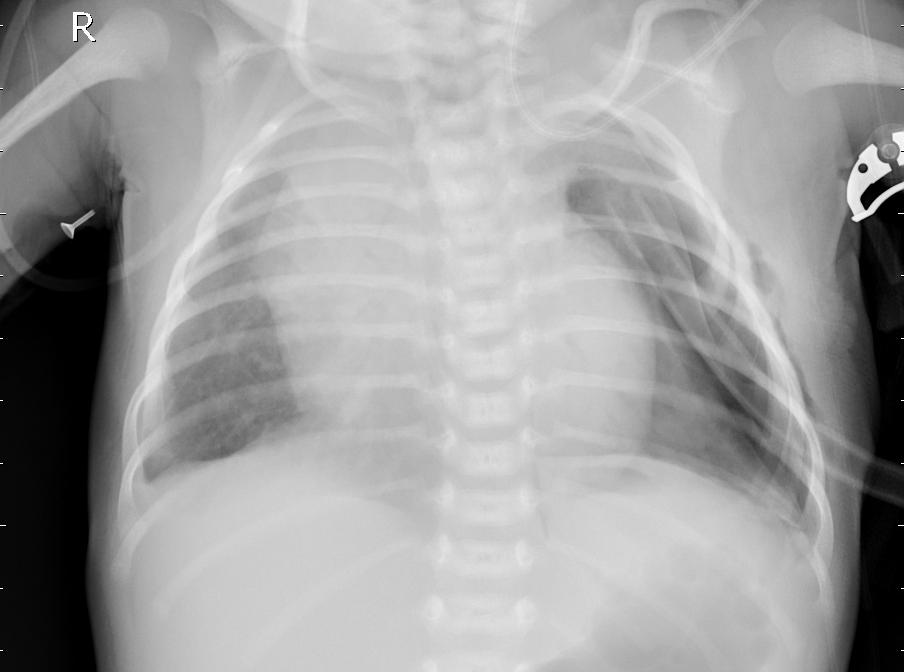

NORMAL2-IM-1152-0001.jpeg


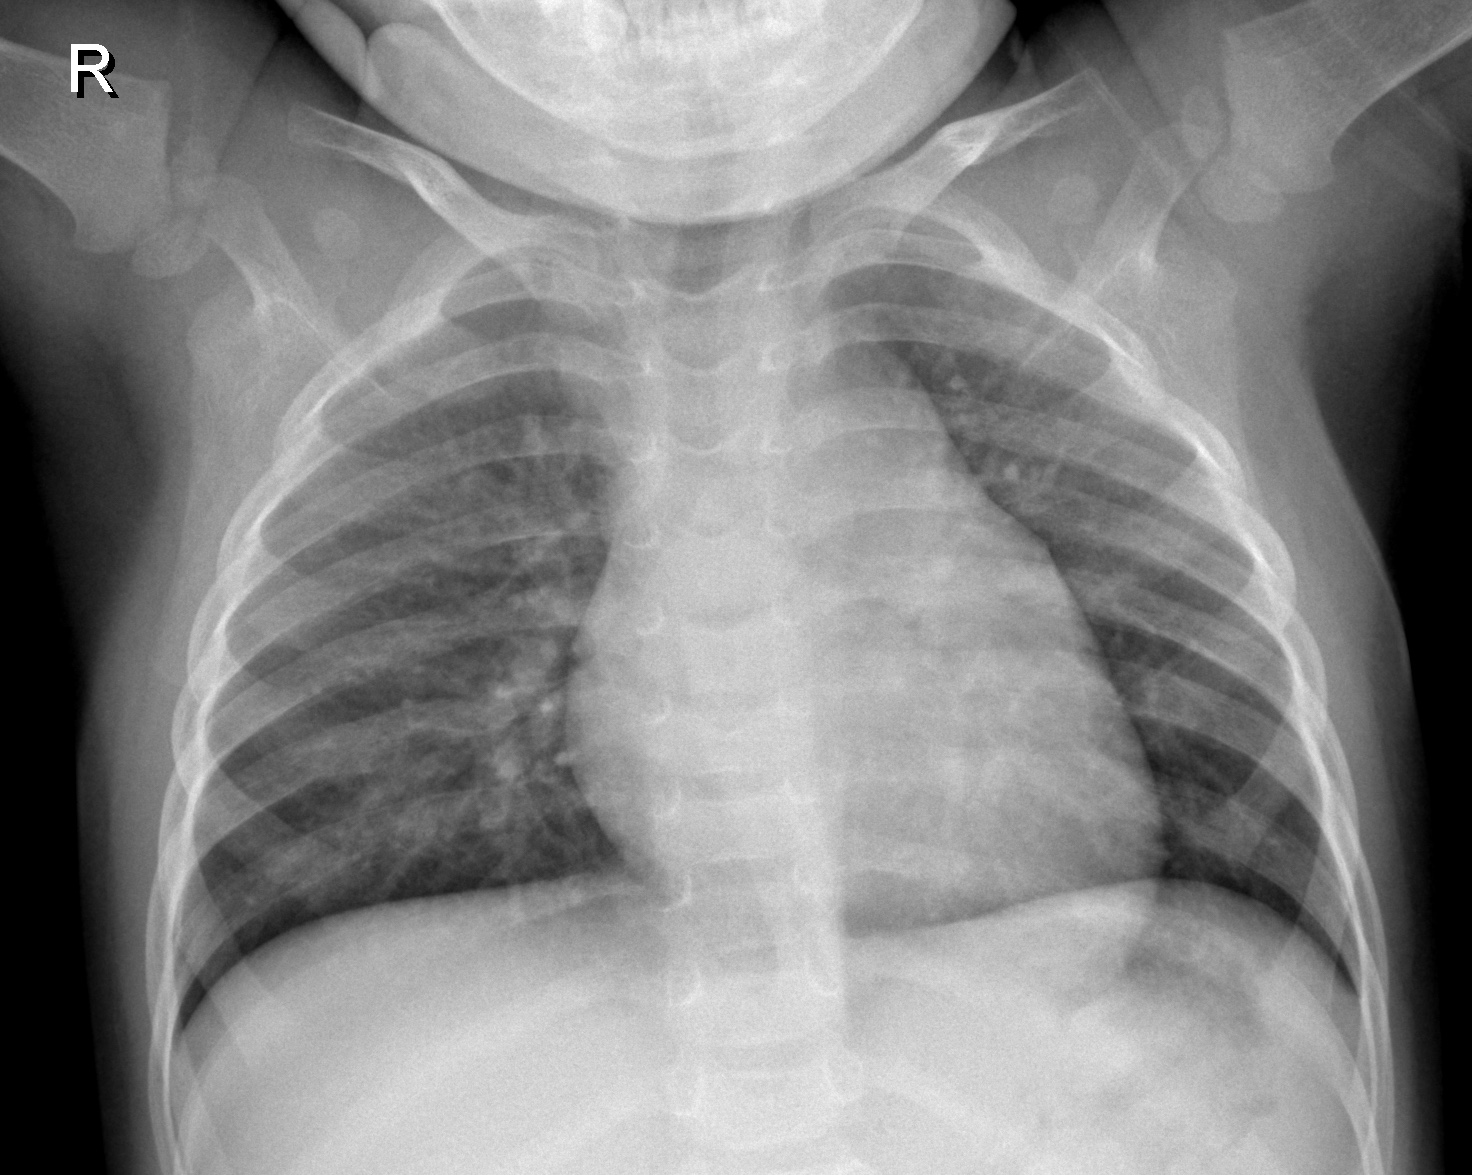

IM-0523-0001.jpeg


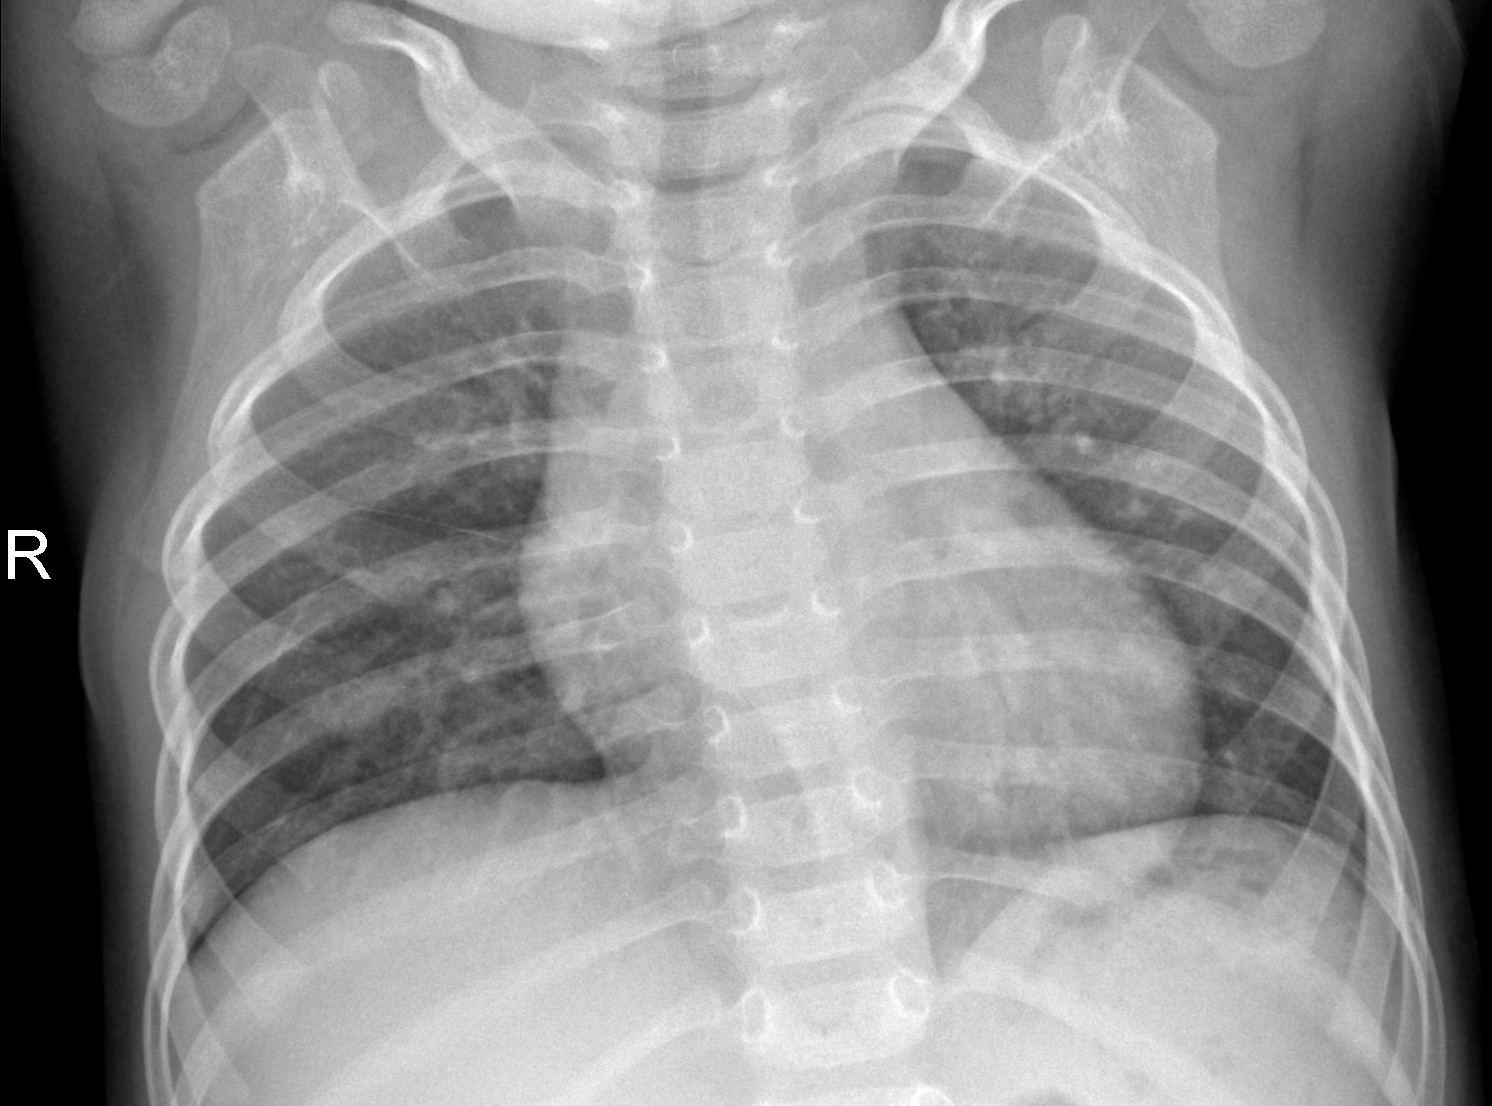

IM-0379-0001.jpeg


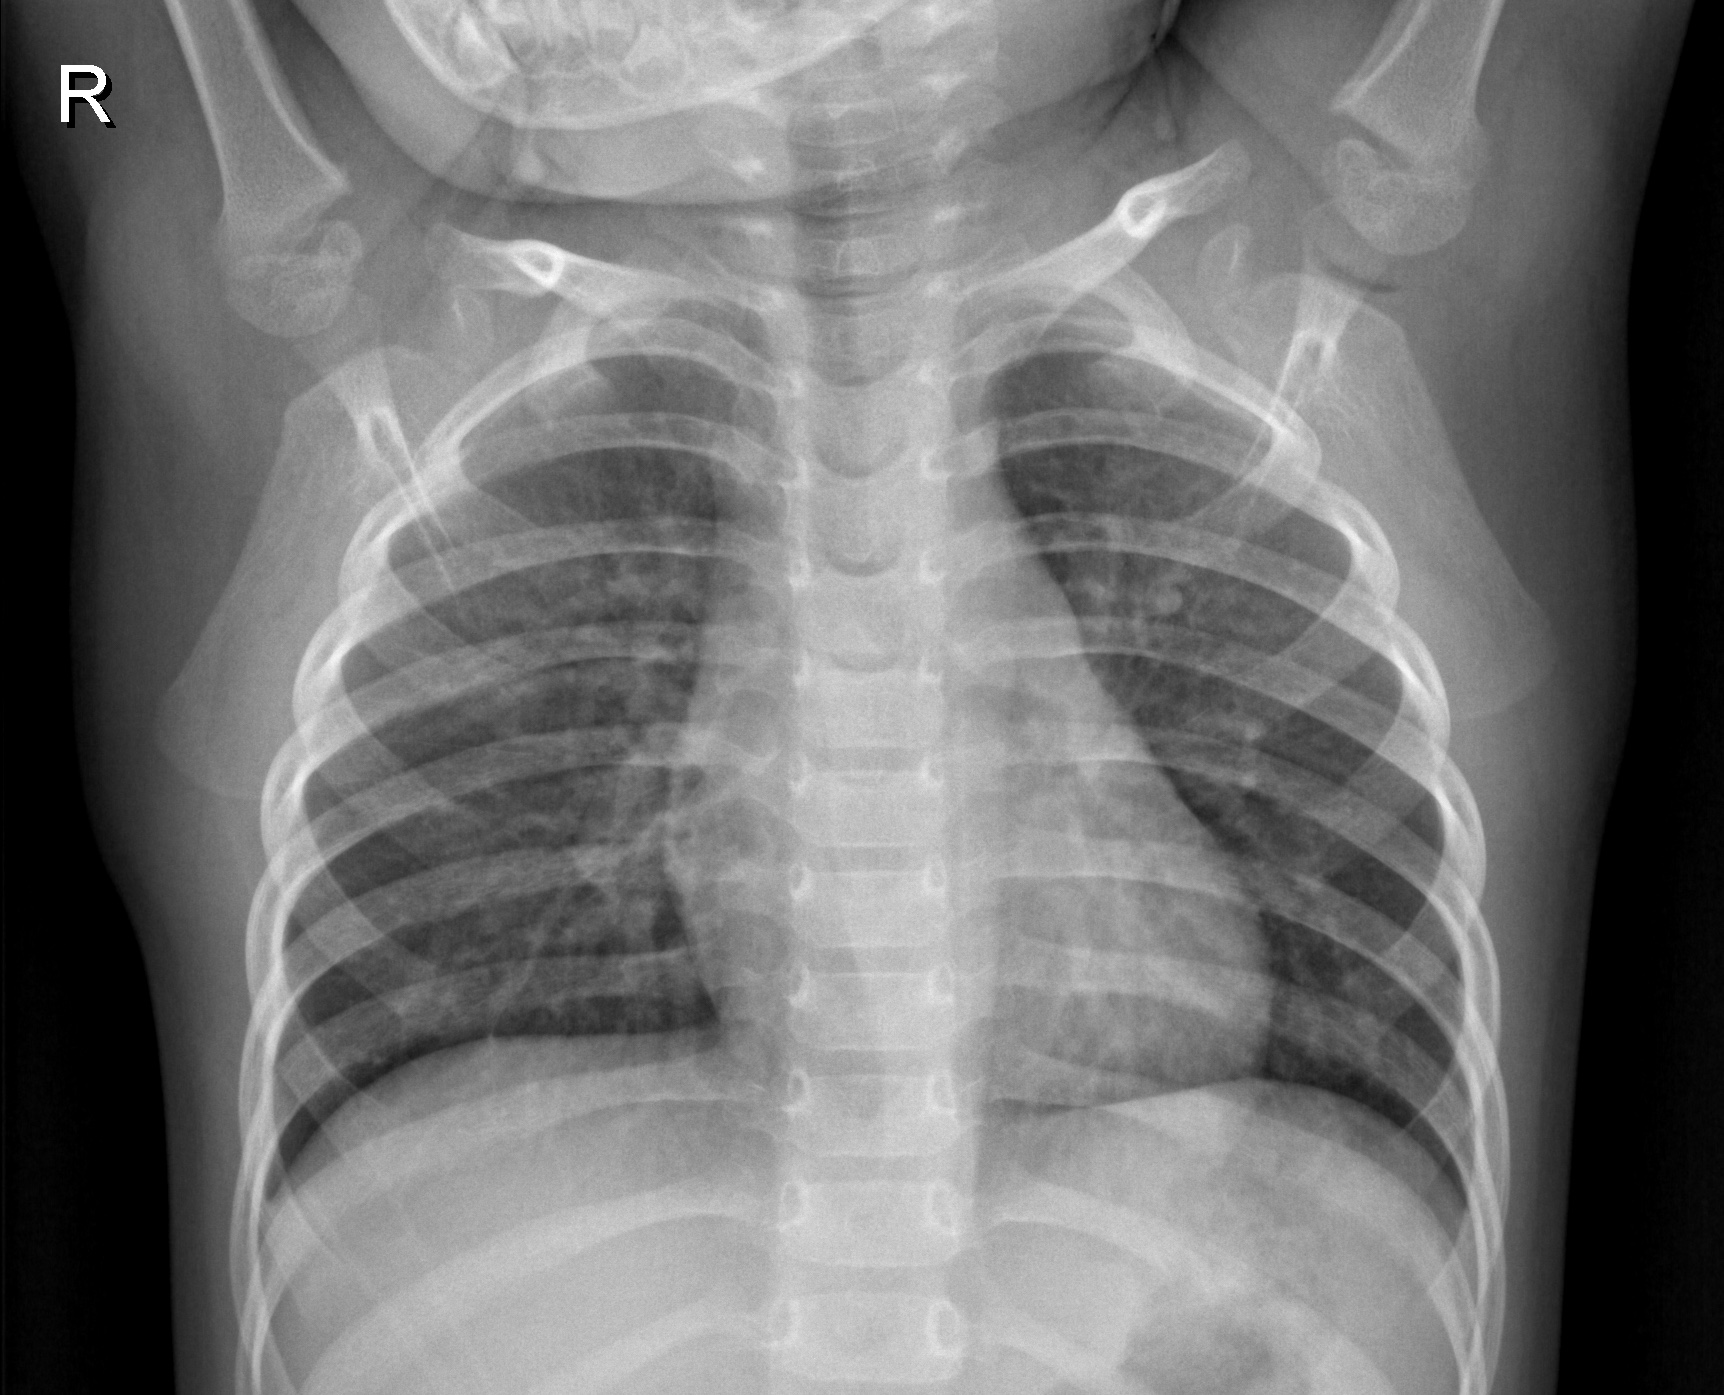

In [3]:
from IPython.display import display
from IPython.display import Image
def images_plot(images,range_low, range_high):
    if ((range_low and range_high) in range(len(normal)) and (range_low < range_high)):
        for i in range(range_low, range_high):
            print(images[i])
            display(Image(filename=folder1 +"/" + images[i], width = 160, height = 240))
    elif ((range_low and range_high) in range(len(normal)+1, len(chest)) and (range_low < range_high)):
        for i in range(range_low, range_high):
            print(images[i])
            display(Image(filename=folder2 +"/" + images[i], width = 160, height = 240))
    else:
        print("Error: Out of Range")
        
images_plot(chest,2364,2367)
images_plot(chest,123,126)

From the images of normal chest and pneumonia, we can hardly tell the differences between them just by insight. It indicates that further analysis of images is essential for this case.

## Pre-processing images

In [4]:
#Code from https://github.com/deadskull7/Pneumonia-Diagnosis-using-XRays-96-percent-Recall/blob/master/Pneumonia%20Diagnosis%20using%20Lung's%20XRay%20.ipynb

def read_data(folder):
    images = []
    labels = [] #Ture status
    for dirc in os.listdir(folder):
        readin = folder + dirc
        if not dirc.startswith('.'):
            if dirc in ['NORMAL']:
                for image_name in tqdm(os.listdir(readin)):
                    label = 'normal'
                    labels.append(label)
            elif dirc in ['PNEUMONIA']: 
                for image_name in tqdm(os.listdir(readin)):
                    if 'bacteria' in str(image_name):         
                        label = 'bacteria'
                    elif 'virus' in str(image_name):
                        label = 'virus'
                    labels.append(label)

            for image_name in tqdm(os.listdir(readin)):
                img = cv2.imread(readin + '/' + image_name) #Read in images from folder
                if img is not None:
                    img = skimage.transform.resize(img, (160,240,3)) #Resize each image into 160*240
                    img = np.asarray(img) #Turn each image into array
                    img = ((img/255.)-.5) * 2  #Standardization
                    images.append(img)
                    
            
    images = np.asarray(images) 
    labels = np.asarray(labels)
    
    return images,labels

In [5]:
chest_images, chest_ture = read_data(folder)

100%|██████████| 1341/1341 [06:29<00:00,  3.27it/s]


In [6]:
print(chest_images.shape)
print(chest_ture.shape)

(5216, 160, 240, 3)
(5216,)


In [7]:
print(chest_ture)

['bacteria' 'bacteria' 'bacteria' ... 'normal' 'normal' 'normal']


In [8]:
i=0
j=0
k=0
for label in chest_ture:
    if label == 'bacteria':
        i=i+1
    elif label == 'virus':
        j=j+1
    else:
        k=k+1
print('bacteria:',i,
      'virus:',j,
     'normal:',k)


bacteria: 2530 virus: 1345 normal: 1341


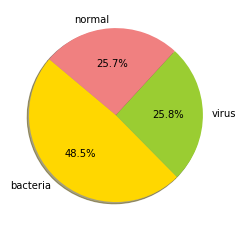

In [9]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'bacteria','virus','normal'
sizes = [2530,1345,1341]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

## Convert to Gray Scale


luminance is by far more important in distinguishing visual features. An excellent suggestion to illustrate this property would be: take a given image and separate the luminance plane from the chrominance planes. We will use 0.3*R+0.59*G+0.11*B to convert all the images into gray sclae. Range of grayscale values should spread out between 0 and 255.

In [10]:
def gray_scale(data):
    '''
    input: a np.array of images of rgb format
    output: a np.array of images of grayscale format
    '''
    n_images = data.shape[0]
    n_rows = data.shape[1]
    n_columns = data.shape[2]
    grayscale = np.zeros((n_images, n_rows, n_columns, 1))
    
    for idx in range(n_images):
        grayscale[idx, :, :, 0] = np.add(0.3*data[idx,:,:,0], 0.59*data[idx,:,:,1],
                                        0.2*data[idx,:,:,2])
    return grayscale  

In [11]:
chest_gray = gray_scale(chest_images)

In [12]:
print(chest_gray.shape)

(5216, 160, 240, 1)


## Linearize the Data

In [13]:
def linearize(data):
    '''
    input:a np.array of images
    output: a 2-D np.array(1-D image feature for each row)
    '''
    num_images = data.shape[0]
    num_columns = int(np.prod(data.shape)/num_images)
    
    linear = np.zeros((num_images, num_columns))
    linear = np.reshape(data, (num_images, num_columns))
    return linear

chest_gray_linear = linearize(chest_gray)
chest_rgb_linear = linearize(chest_images)

In [222]:
print(chest_gray_linear.shape)

(5216, 38400)


# Description of Final Dataset
Each column in dataset represents a specific pixel, each row represents one image,which is total 5216 images. A value in dataset represents the darkness or grayscale of the image. Our target is 3 classes outuput, normal, bacteria and virus.

# Data Reduction

# Principal Component Analysis (PCA)

## PCA Equations

Raschka, S. and Mirjalili, V. (n.d.). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. 2nd ed. Packt Publishing.

### Feature Reduction:

$$x = \begin{bmatrix}
x_{1} & x_{2} & ... & x_{d}
\end{bmatrix}, x \,  \epsilon \,  \mathbb{R}^{d}$$

$$\downarrow xW, W\epsilon \, \mathbb{R}^{dxk}$$

$$z = \begin{bmatrix}
z_{1} &z_{2}  & ... & z_{k}
\end{bmatrix}, z\, \epsilon \, \mathbb{R}^{k}$$



### Creating the Covariance Matrix (pg 145-pg 146 in Raschka)
$$\sigma _{jk} = \frac{1}{n}\sum_{i = 1}^{n} (x^{(i)}_{j} -\mu _{j})(x_{k}^{(i)} -\mu _{k})$$


$$ \sum = \begin{bmatrix}
\sigma ^{2}_{1} & \sigma _{12} & \sigma _{13} \\ 
 \sigma _{21}& \sigma ^{2}_{2} & \sigma _{23}\\ 
 \sigma _{31}& \sigma _{32} & \sigma ^{2}_{3}
\end{bmatrix} $$

### Find Eigenvalues (pg 146 in Raschka)

$$\varepsilon  v = \lambda v$$

### Total and Explained Variance (pg 147 in Raschka)

$$\frac{\lambda _{j}}{\sum_{j=1}^{d} \lambda _{j}}$$



### Projecting onto new Feature Space (page 162 in Raschka)

$$X^{'} = XW$$

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

In [17]:
def full_pca(data,n):
    '''
    input:data,n_components
    output: full pca of data
    '''
    chest_pca = PCA(n_components=n)
    return chest_pca.fit(chest_gray_linear)

In [18]:
chest_pca = full_pca(chest_gray_linear,5216)

# Plot individual and cumulative explained variance

In [19]:
def explain_variance(pca):
    '''
    input:pca 
    output: explained variance
    '''
    explained_var = pca.explained_variance_ratio_
    return explained_var

In [20]:
def cumu_variance(pca):
    '''
    input:pca 
    output: cumulative variance
    '''
    cumu_var_exp = np.cumsum(pca.explained_variance_ratio_)
    return cumu_var_exp

In [21]:
cumu_var = cumu_variance(chest_pca)
explained_var = explain_variance(chest_pca)
print(cumu_var)
print(explained_var)

[0.25632606 0.36139141 0.43453036 ... 1.         1.         1.        ]
[2.56326056e-01 1.05065359e-01 7.31389425e-02 ... 2.46829023e-37
 2.46299002e-37 4.40894729e-38]


In [22]:
#!pip install cufflinks plotly

In [23]:
#The plot_explained_variance function is adapted from Eric's 04. Dimension Reduction and Images

from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
import plotly 
def plot_explained_variance(var1,var2):  
    plotly.offline.iplot({
    "data": [Scatter(y=var1, name='Explained variance'),
             Scatter(y=var2, name='cumulative explained variance')
        ],
    "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [24]:
plot_explained_variance(explained_var,cumu_var)

/Users/xuechenli/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/Users/xuechenli/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




Retaining 40 components will get an explained variance ratio of 0.8 and retaining 200 components will get an explained variance ratio of 0.9. Since 200 is at the knee of the graph, it is appropriate for us to using the first 200 components to represent the chest image.

# PCA with first 200 components

In [25]:
chest_pca_first200 = full_pca(chest_gray_linear,200)

# Plot individual and cumulative explained variance ( first 200 components)

In [26]:
cumu_var = cumu_variance(chest_pca_first200)
explained_var = explain_variance(chest_pca_first200)
plot_explained_variance(explained_var,cumu_var)

/Users/xuechenli/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/Users/xuechenli/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




# Reshape with first 200 components

In [27]:
eigen_chest = chest_pca_first200.components_.reshape(200,160,240)

In [28]:
eigen_chest.shape

(200, 160, 240)

In [29]:
#The plot_gallery function is from Eric's 04. Dimension Reduction and Images

import matplotlib.pyplot as plt# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=4, n_col=6):
    """
    input:  image matrix
    output: image gallery 
    """
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

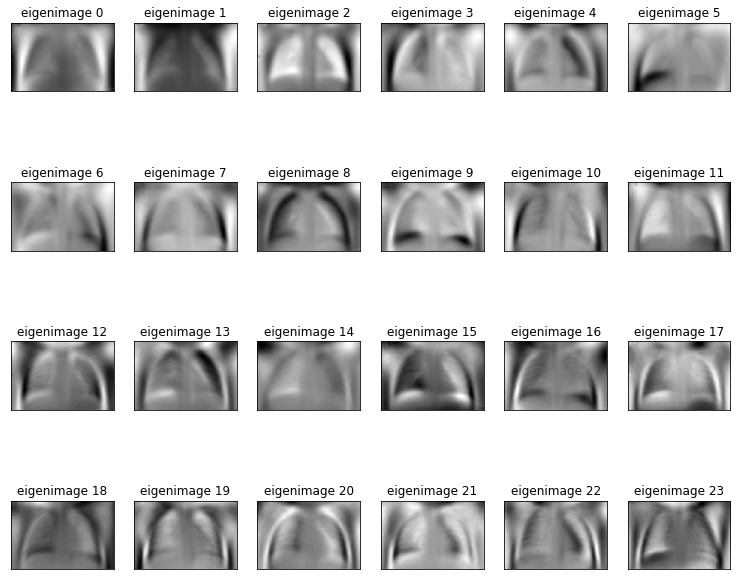

In [30]:
eigenlabels = ['eigenimage ' + str(i) for i in range(eigen_chest.shape[0])]
plot_gallery(eigen_chest,eigenlabels,160,240)

The components represent our images well. The first component reflect the average of the 5216 images

# Compare Original with PCA

In [31]:
#Reconstruct_image function is adapated from Eric's 04 Dimensional Reduction and Images
''' original from Eric
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 131    
chest_gray_linear_idx = chest_gray_linear[idx_to_reconstruct]
low_dim, reconstructed_image = reconstruct_image(chest_pca_first200,chest_gray_linear_idx.reshape(1, -1))
'''
def reconstruct_image(trans_obj,pca_features,idx):
    '''
    input:pca_data,trans_obj,org_features,idx
    output:tranformation of the specific picture
    '''
    low_dim = trans_obj.transform(pca_features[idx].reshape(1,-1))
    rec_image = trans_obj.inverse_transform(low_dim)
    return low_dim, rec_image

In [32]:
chest_gray_linear.shape

(5216, 38400)

In [33]:
chest_pca_first200.components_.shape

(200, 38400)

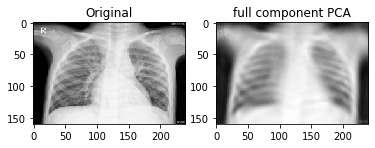

In [34]:
#Make a comparison here
#Take the 100th image as an example
low_dim, rec_image = reconstruct_image(chest_pca_first200,chest_gray_linear,100)

plt.subplot(1,2,1)
plt.imshow(chest_gray_linear[100].reshape(160,240), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)

plt.subplot(1,2,2)
plt.imshow(rec_image.reshape(160,240), cmap=plt.cm.gray)
plt.title('full component PCA')
plt.grid(False)

As a check on our code, we tried to calculate Radial Based PCA as a negative case to see whether it is the worst one among those PCA methods.  From the image analysis, we expect it to be the worst.  Thankfully, it only has an accuracy of 72%.

# New for lab4

So comparing PCA and Kernal PCA with the first 200 components, it is clear that the PCA and polynomial PCA 
do the best with more than 95% accuracy, while the Radial Based PCA does the worst, with only 75% accuarcy.

Above all, we would use the full PCA with first 200 components to be the final dataset that is used for classification.

# Split train and test data set

## Use Stratified 10-fold to separate train and test set

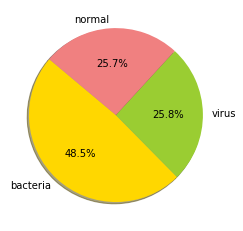

In [35]:
# Data to plot
labels = 'bacteria','virus','normal'
sizes = [2530,1345,1341]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

As you can see above, we have 1341 samples that are normal, 2530 samples that are pneumonia-bacteria and 1345 samples that are pneumonia-viral, the proportion are quite different for three classes. So we want to keep the same proportion of different classes in each fold to make sure that each fold is a good representative of the whole data. Another problem we have to pay attention to is our sample size. From the counts of three categories, the sample size for normal and pneumonia-viral is small. After we do a 80/20 split for train and test set, we only have 1341/5=268 samples of normal in the test set. It is not enough, and we can get almost any performance on this set only due to chance. In K Fold cross validation, the data is divided into k subsets. 

Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. As a general rule and empirical evidence, K = 5 or 10 is generally preferred as it is often reported that the optimal k is between 5 and 10 , because the statistical performance does not increase a lot for larger values of k. So for our problem, using a 5/10 fold cross validation method to do an 80/20 split is a better way. Since we also want the same proportion of different classes in each fold, Stratified 10-fold is a better choice.

## Reference
Arlot, Sylvain, and Alain Celisse. “A Survey of Cross-Validation Procedures for Model Selection.” Statistics Surveys, The Author, under a Creative Commons Attribution License, https://projecteuclid.org/download/pdfview_1/euclid.ssu/1268143839.

Gupta, Prashant. “Cross-Validation in Machine Learning.” Medium, Towards Data Science, 5 June 2017, https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f.

Shulga, Dima. “5 Reasons Why You Should Use Cross-Validation in Your Data Science Projects.” Medium, Towards Data Science, 27 Sept. 2018, https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79.

# Use sklearn StratifiedKFold to implement

We use our method to evaluate the metric by 10-fold Stratified Cross Validation.

In [15]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn import metrics

chest_skf=StratifiedKFold(n_splits=10)
X_train = []
X_test = []
y_train = []
y_test = []

for train_index,test_index in chest_skf.split(chest_gray_linear,chest_ture):
    print("Train Index:",train_index,",Test Index:",test_index)
    X_train_temp, X_test_temp =chest_gray_linear[train_index],chest_gray_linear[test_index]
    y_train_temp ,y_test_temp =chest_ture[train_index],chest_ture[test_index]
    
    X_train.append(X_train_temp)
    X_test.append(X_test_temp)
    y_train.append(y_train_temp)
    y_test.append(y_test_temp)


Train Index: [ 373  378  381 ... 5213 5214 5215] ,Test Index: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184

In [16]:
print(len(X_train[0]))
print(len(X_test[0]))
print(len(y_train[0]))
print(len(y_test[0]))

4693
523
4693
523


In [17]:
print(X_train[0].shape)

(4693, 38400)


# Evaluate metric

## Metrics measurement

As we mentioned in False Positive vs False Negative Trade-off, in all classification problems, it is important to consider which is worse: false positives or false negatives. In this case, we will define a false positive as when the algorithm predicts that a child has pneumonia even when he or she doesn’t. A false negative is when the classivier predicts that the child does not have pneumonia even when the child does. In this case, it is clear that we want to limit the amount of false negatives. We also want to keep children from unnessary treatment, which will happen in false positive situation.

Since higher recall ratio illustrates lower false negative and we also concer about lower false positive, we should use **F1-score** as our main metric. F1-score are defined for binary classes. There are two ways to combine it into multiple classes. **micro** is calculated for the individual TPs, TNs, FPs, FNs of the confusion matrix, which weights each instance equally. **macro** is calculated as the average scores of the confusion matrix, which weights each class equally to evaluate the overall performance. Since we have an imbalanced instance for each class, we perfer to use F1 weighted macro-average score.

Given the metric for $K^{th}$ classes $X_k$:
$$F1_{micro} = \frac {2\times (TP_1 + ... + TP_k) } {2\times (TP1_1 +  ... + TP_k) + FP_1 +  ... + FP_k + FN_1 + ... + FN_k} $$

$$F1_{macro} = \frac {X_1  + ... + X_k} {k} $$

# 3. Modeling

## We start with the template developed by the instuctor in the course: 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, f1_score

In [98]:
def average_magnitude(gradient):
    '''
    Input: gradient
    Output: average mangintude
    '''
    absolute = np.abs(gradient)
    return np.mean(absolute)

In [99]:
# Adapted from Eric's 07. MLP Neural Networks
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=30,phi_function='sigmoid', cost_function='quadratic', n_layers=2,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phi_function = phi_function  
        self.cost_function = cost_function
        self.n_layers=n_layers
    
            
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot
    
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W = []

        for i in range(self.n_layers):
            if 0 == i:
                # First,d dimension for the first weights
                size = (self.n_hidden, self.n_features_ + 1) 
            elif self.n_layers-1 == i:
                # last, stop at the n_layers-1
                size = (self.n_output_, self.n_hidden + 1)
            else:
                size = (self.n_hidden, self.n_hidden + 1)

            W.append(np.random.uniform(-1, 1, size)) 
        return W

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
        
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    
    @staticmethod
    def _L2_reg(lambda_, W):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        k = 0.
        for i in range (len(W)):
            k += np.mean(W[i][:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(k)

    def _cost(self, A_last, Y_enc, W):
        '''Get the objective function value'''
        if 'quadratic' == self.cost_function:
            cost = np.mean((Y_enc - A_last) ** 2)
        elif 'crossentropy' == self.cost_function:
            cost = -np.mean((Y_enc * np.log(A_last) + (1 - Y_enc) * np.log(1 - A_last)))

        L2_term = self._L2_reg(self.l2_C, W)
        return cost + L2_term

In [100]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W):
        """Compute feedforward step"""    
        if  'linear' == self.phi_function:
            activate = self._linear
        elif  'sigmoid' == self.phi_function:
            activate = self._sigmoid
        else:
            raise 'Not a valid of phi_function'
            
        #Initialize A,Z
        A, Z = [], []
        A.append(self._add_bias_unit(X.T, how='row'))
        Z.append(W[0] @ A[0])
        for i in range(1,self.n_layers):
            A.append(self._add_bias_unit(activate(Z[i-1]), how='row'))
            Z.append(W[i] @ A[i])
        #Last layer A
        A.append(activate(Z[-1]))
        return A,Z
    
    def _get_gradient(self, A, Z, Y_enc, W):
        """ Compute gradient step using backpropagation."""
        # vectorized backpropagation
        grad, V = [[]] * self.n_layers, [[]] * self.n_layers

        # First
        if 'crossentropy' == self.cost_function:
            V[-1] = A[-1] - Y_enc
        elif 'quadratic' == self.cost_function: # mse
            V[-1] = -2 * (Y_enc-A[-1]) * A[-1] * (1-A[-1])
        else:
            raise 'Not a valid of cost_function'   
        grad[-1] = V[-1] @ A[-2].T
        
        # After first
        for i in range(self.n_layers-2, -1, -1): #We want to start at the last layer, including 0
            if 'linear' == self.phi_function:
                V[i] = W[i+1].T @ V[i+1]
            elif 'sigmoid' == self.phi_function:
                V[i] = A[i+1] * (1-A[i+1]) * (W[i+1].T @ V[i+1])
            V[i] = V[i][1:,:]

            grad[i] = V[i] @ A[i].T 
    
        # regularize weights that are not bias terms
        for i in range(len(grad)):
            grad[i][:, 1:] += W[i][:, 1:] * self.l2_C

        return grad

    def predict(self, X):
        """Predict class labels"""
        A, _ = self._feedforward(X, self.W)
        y_pred = np.argmax(A[-1], axis=0)
        return [self.class_labels_[i] for i in y_pred] #get rid of index

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        self.class_labels_ = np.unique(y)
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W = self._initialize_weights()
        
        self.magnitude_gradients = []
        for i in range(self.n_layers):
            self.magnitude_gradients.append(np.zeros([self.epochs, 1]))

        self.cost_ = []
        self.score_ = []
        gradients = [[]] * self.n_layers
        for epoch in range(self.epochs):
            if print_progress>0 and (epoch+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (epoch+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances          
            A, Z = self._feedforward(X_data, self.W)
            cost = self._cost(A[-1], Y_enc, self.W)
            self.cost_.append(cost)            
            
            self.score_.append(f1_score(y, self.predict(X_data), average='weighted'))

            # compute gradient via backpropagation
            grad = self._get_gradient(A, Z, Y_enc, self.W)

            for grad_idx in range(len(grad)):
                self.W[grad_idx] -= self.eta * grad[grad_idx] 
                gradients[grad_idx].append(np.mean(grad[grad_idx]))

            for layer in range(self.n_layers):
                self.magnitude_gradients[layer][epoch] = average_magnitude(grad[layer])
                
        self.gradients_ = [[]] * self.n_layers
        for i in range(self.n_layers):
            self.gradients_[i] = np.array(gradients[i])
            

        return self
    

In [234]:
def my_para(phi_function,cost_function,n_layer):
    my_params = dict(n_hidden=30, 
                     C=0.01,
                     epochs=200, #Change a large number 
                     eta=0.01, 
                     phi_function = phi_function , # Support: sigmoid, linear, relu, silu
                     cost_function = cost_function, # Support: quadratic, crossentropy
                     n_layers=n_layer)
    return my_params

In [229]:
cost_functions = ['quadratic', 'crossentropy']
phi_functions = ['sigmoid', 'linear']
n_layers = [2,3,5]

# Tuning Parameter

We tried to use "GirdSearchCV" of scikit-learn, but it did not work, we decided to use a for loop to determine the hyper parameters of our model. (Following code is our "GridSearchCV", and we really have no idea how to debug it, please help!!!)

In [ ]:
#from sklearn.model_selection import cross_val_score

# scores = cross_val_score(estimator=nn_pipe,
#                          X=X_train,
#                          y=y_train,
#                          cv=10,
#                          n_jobs=-1,
#                          scoring = 'f1_macro')

#print('CV f1 scores: %s' % scores)
#print('CV f1 score: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
# n_hidden = [30]
# C = [0.01]
# epochs = [200]
# eta = [0.01, 0.001]
# cost_functions = ['quadratic', 'crossentropy']
# phi_functions = ['sigmoid', 'linear']
# n_layers = [2,3,5]
# random_state=[1]

In [ ]:
# param_grid = {'nn__n_hidden':[30], 'nn__C': [0.01], 'nn__epochs': [1], 'nn__eta':[0.01,0.001], 
#               'nn__phi_function': ['sigmoid', 'linear'], 'nn__cost_function':['quadratic', 'crossentropy'],
#               'nn__n_layers': [2,3,5],'nn__random_state': [1]}

In [ ]:
# nn_pipe_verbose = Pipeline([('pca', PCA(n_components=200)),
#                 ('scl',StandardScaler()),
#                 ('nn', TwoLayerPerceptron())])
# print(nn_pipe_verbose.get_params().keys())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# gs = GridSearchCV(estimator = nn_pipe_verbose,
#                  param_grid = param_grid,
#                  scoring = 'f1_macro',
#                  cv = 2)
# gs.fit(X_train_all, y_train_all)

# scores  = cross_val_score(gs, X_train_all,  y_train_all, scoring = 'f1_macro', cv = 10, n_jobs=-1)
# print('CV . f1 score: %.3f +/-  %.3f' % (np.mean(scores), mp.std(scores)))

In [ ]:
# print(scores.report())
# scores.boxplot_parameters(display_train = False)

After using CV to tune parameter, we used test set to test the model's performance.

In [230]:
# Use TwoLayerPerceptron on the gray_scaled chest data(no pca used here), written by ourselves
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

f1_all = np.zeros([2,2,3,10])

for cost_idx, cost_function  in enumerate(cost_functions):
    for phi_idx, phi_function  in enumerate(phi_functions):
        for n_idx, n_layer  in enumerate(n_layers):
            my_params = my_para(phi_function,cost_function,n_layer)
            my_mlp = TwoLayerPerceptron(**my_params)
            my_f1_lst = []
            my_acc_lst = []
            my_pre_lst = []       
            X_train_temp_train_all = []
            X_train_temp_validate_all = []
            y_train_temp_train_all = []
            y_train_temp_validate_all = []
            for idx, _ in enumerate(X_train):
                #X_train_temp = X_train[idx]
                #y_train_temp = y_train[idx]
                #X_test_temp = X_test[idx]
                #y_test_temp = y_test[idx]
                
                X_train_temp_train, X_train_temp_validate, y_train_temp_train, y_train_temp_validate\
                = train_test_split(X_train[idx],y_train[idx],test_size = 0.25)
                
                X_train_temp_train_all.append(X_train_temp_train)
                X_train_temp_validate_all.append(X_train_temp_validate)
                y_train_temp_train_all.append(y_train_temp_train)
                y_train_temp_validate_all.append(y_train_temp_validate)
                
                X_train_final = X_train_temp_train_all[idx]
                X_validate_final = X_train_temp_validate_all[idx]
                y_train_final = y_train_temp_train_all[idx]
                y_validate_final = y_train_temp_validate_all[idx]
                
                #X_train_temp_train_all.append(X_train_temp_train[idx])                
                # PCA: Using the first 200 components on the train set
                pca = PCA(n_components=200)
                pca_model = pca.fit(X_train_final)
                
                X_train_temp = pca_model.transform(X_train_final)
                X_cv_temp = pca_model.transform(X_validate_final)
                
                # Normalize
                scaler = StandardScaler()
                st_scaler= scaler.fit(X_train_final)
                X_train_temp = st_scaler.transform(X_train_final)
                X_cv_temp = st_scaler.transform(X_validate_final)
                             
            
                my_mlp.fit(X_train_final, y_train_final)
                my_yhat = my_mlp.predict(X_cv_temp)

                my_f1_score = f1_score(y_validate_final,my_yhat,average='weighted')
                my_f1_lst.append(my_f1_score)
                
                f1_all[cost_idx, phi_idx, n_idx, idx] = my_f1_score    
            f1_ave  = np.mean(my_f1_lst)
        
            print('cost:', cost_function, 'phi:', phi_function, 'layer:',n_layer, 'f1_score:', f1_ave)


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.p

cost: quadratic phi: sigmoid layer: 2 f1_score: 0.28413867686790895


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.p

cost: quadratic phi: sigmoid layer: 3 f1_score: 0.2696868559707386


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.p

cost: quadratic phi: sigmoid layer: 5 f1_score: 0.2352392868618566


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in square
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python

cost: quadratic phi: linear layer: 2 f1_score: 0.31862614163441555


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in square
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarnin

cost: quadratic phi: linear layer: 3 f1_score: 0.3208865878125156


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to

cost: quadratic phi: linear layer: 5 f1_score: 0.3163229247059043


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classifi

cost: crossentropy phi: sigmoid layer: 2 f1_score: 0.26005156852428446


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classifi

cost: crossentropy phi: sigmoid layer: 3 f1_score: 0.21941865951755896


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classifi

cost: crossentropy phi: sigmoid layer: 5 f1_score: 0.25788247092354816


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in square
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precis

cost: crossentropy phi: linear layer: 2 f1_score: 0.3183547566538152


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in square
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precis

cost: crossentropy phi: linear layer: 3 f1_score: 0.318018098128987


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWa

cost: crossentropy phi: linear layer: 5 f1_score: 0.31371373992170315


In [231]:
print(f1_ave)

0.31371373992170315


In [232]:
print(f1_all)

[[[[0.30717577 0.33049791 0.33406214 0.32139333 0.31288121 0.21596227
    0.31923442 0.30994512 0.28621696 0.10401762]
   [0.10904735 0.29891659 0.3295545  0.32211009 0.31087004 0.30533404
    0.31365016 0.31087004 0.10215559 0.29436016]
   [0.32485045 0.31923442 0.10904735 0.3164383  0.32016823 0.11416942
    0.10778121 0.10589286 0.30902111 0.32578952]]

  [[0.33333333 0.32110292 0.30809799 0.32203849 0.31736946 0.30625445
    0.32861195 0.30717577 0.3295545  0.31272256]
   [0.33428019 0.3164383  0.31179585 0.31736946 0.33712592 0.33712592
    0.31923442 0.31179585 0.30166146 0.32203849]
   [0.32297493 0.31272256 0.30074559 0.30166146 0.34093218 0.32016823
    0.31087004 0.30902111 0.31457865 0.3295545 ]]]


 [[[0.27458919 0.31457865 0.33248391 0.33712592 0.3154874  0.09604516
    0.34533143 0.30717577 0.1641741  0.11352416]
   [0.10153786 0.10277479 0.32110292 0.0883272  0.09847143 0.32297493
    0.1927215  0.32110292 0.33522792 0.30994512]
   [0.33997934 0.28711803 0.30625445 0.110

The result is the same with the best F1 score of 31.37% when using corssentropy as cost function, sigmoid as phi function, and 2 layers.

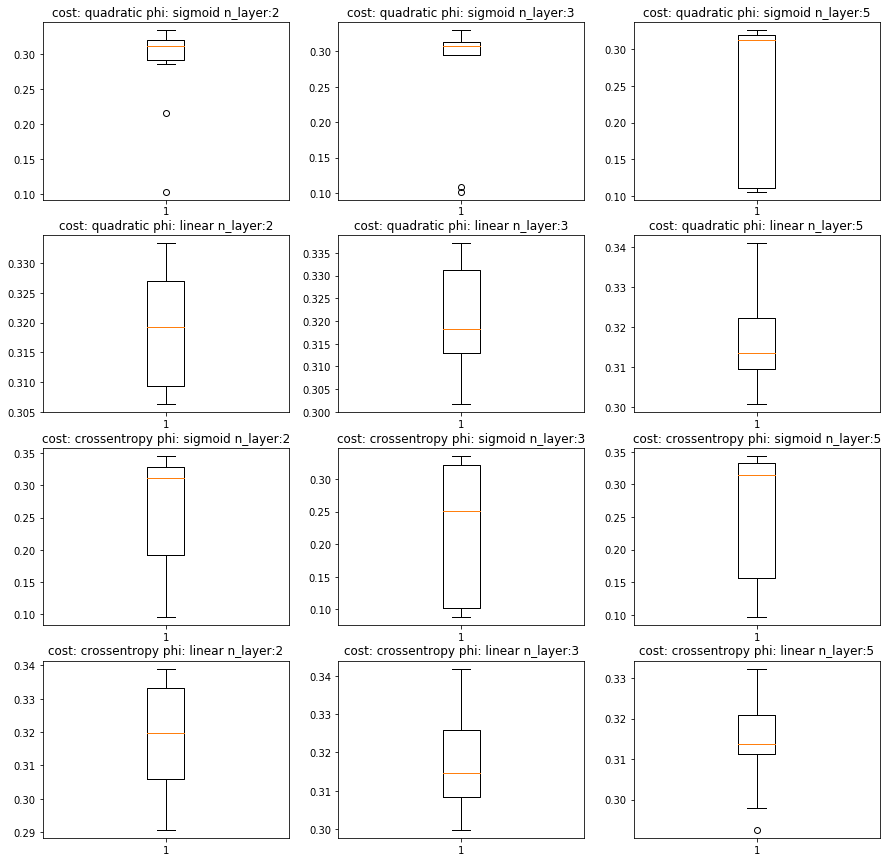

In [352]:
cost_functions = ['quadratic', 'crossentropy']
phi_functions = ['sigmoid', 'linear']
n_layers = [2,3,5]
m = 0
plt.figure(figsize=(15,15))
for cost_idx, cost_function  in enumerate(cost_functions):
    for phi_idx, phi_function  in enumerate(phi_functions):
        for n_idx, n_layer  in enumerate(n_layers):
            m = m+1
            plt.subplot(4,3,m)
            plt.boxplot(f1_all[cost_idx,phi_idx,n_idx,:])
            plt.title('cost: ' + str(cost_function) + ' phi: ' + str(phi_function) + ' n_layer:' + str(n_layer))

So we can seen from the boxplot above that 'cost:crossentrophy, phi:sigmoid, n_layer:2' has the highest f1_score from our grid search. So this is our best model.

# Using Eric Nested Cross Validation, PCA added

## Evaluation of Stratified 10 Fold CV

In [235]:
#Using pipeline in sklearn to combine PCA, Standardization and TwoLayerPerceptron method together
from sklearn.preprocessing import StandardScaler
n_components = 200
nn_pipe = Pipeline([('pca', PCA(n_components=n_components)),
                ('scl',StandardScaler()),
                ('nn', TwoLayerPerceptron())
               ])

In [236]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(chest_gray_linear,chest_ture,test_size = 0.2)

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train_all, y_train_all)

my_params = my_para('sigmoid', 'crossentropy',2)
my_mlp = TwoLayerPerceptron(**my_params)
scores = []
for k, (train, test) in enumerate(kfold):
    nn_pipe = Pipeline([('pca', PCA(n_components=n_components)),
                ('scl',StandardScaler()),
                ('nn', my_mlp)
               ])
    nn_pipe.fit(X_train_all[train], y_train_all[train])
    yhat = nn_pipe.predict(X_train_all[test])
    score = f1_score(yhat, y_train_all[test], average='weighted')
    scores.append(score)
    print('Fold: %s, F1_score: %.3f' % (k+1, score))
    
print('\n F1_score: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 1, F1_score: 0.691


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 2, F1_score: 0.703


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold: 3, F1_score: 0.617


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold: 4, F1_score: 0.695


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 5, F1_score: 0.745


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold: 6, F1_score: 0.743


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 7, F1_score: 0.690


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 8, F1_score: 0.733


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold: 9, F1_score: 0.758


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


Fold: 10, F1_score: 0.718

 F1_score: 0.709 +/- 0.039


# Our Best Version

In [220]:
## Our Best version:
## Using test dataset to verify model performance

phi_function = 'sigmoid'
cost_function = 'crossentropy'
n_layer = 2

my_params = my_para(phi_function,cost_function,n_layer) #epoch=200
my_mlp = TwoLayerPerceptron(**my_params)
 # PCA: Using the first 200 components on the train set
pca = PCA(n_components=200)                

for i in range(10):   
    pca_model = pca.fit(X_train[i])
    X_train_temp = pca_model.transform(X_train[i])
    X_test_temp = pca_model.transform(X_test[i])
    # Normalize
    scaler = StandardScaler()
    st_scaler= scaler.fit(X_train_temp)
    X_train_temp = st_scaler.transform(X_train_temp)
    X_test_temp = st_scaler.transform(X_test_temp)
    my_mlp.fit(X_train_temp, y_train[i])
    my_yhat = my_mlp.predict(X_test_temp)
    y_test_temp = y_test[i]
    my_f1_score = f1_score(y_test_temp,my_yhat,average='weighted')
    print('fold'+ str(i+1),my_f1_score)
  

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


fold1 0.6570850618694065


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


fold2 0.7562892726565728


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold3 0.7436976552936754


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


fold4 0.7299583297396876


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold5 0.46104985319247116


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


fold6 0.6666592311758244


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold7 0.7042474476035019


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold8 0.7342663442698226


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold9 0.6923522894951333


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold10 0.4342950004197478


## Visualization Magnitude of Gradients

# Use digit dataset to make sure our Twolayerpercepron is correct

In [104]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
X = ds.data/16.0-0.5 # normalize the data
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]


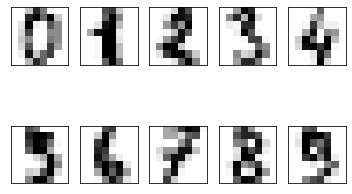

In [105]:
# reshape and print a few of the images in the digits dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

In [106]:
clf = TwoLayerPerceptron(n_hidden=10, epochs=1500, eta=0.001)
clf.fit(X,y)

from sklearn.metrics import accuracy_score
yhat = clf.predict(X)
accuracy_score(y,yhat)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9805230940456316

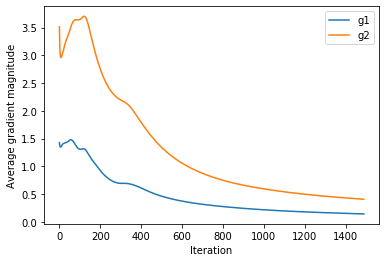

In [162]:
#digit data
ax = plt.subplot(1,1,1)

for w in range(n_layers):
    plt.plot(clf.magnitude_gradients[w][10:], label = 'g' + str(w +1))
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

Compared the accuracy and the magnitude of the gradients plot above, our result is consistent with what we got in ICA3.

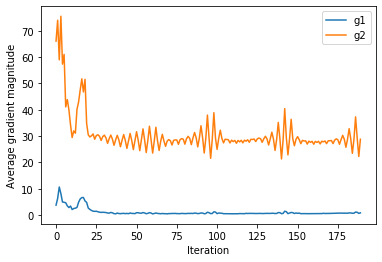

In [223]:
# Our chest data

ax = plt.subplot(1,1,1)

for w in range(n_layer):
    plt.plot(my_mlp.magnitude_gradients[w][10:], label = 'g' + str(w+1))
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

Due to the highly sensitive nature of last layers as it is directly connected to the output, we can see high value of g2.

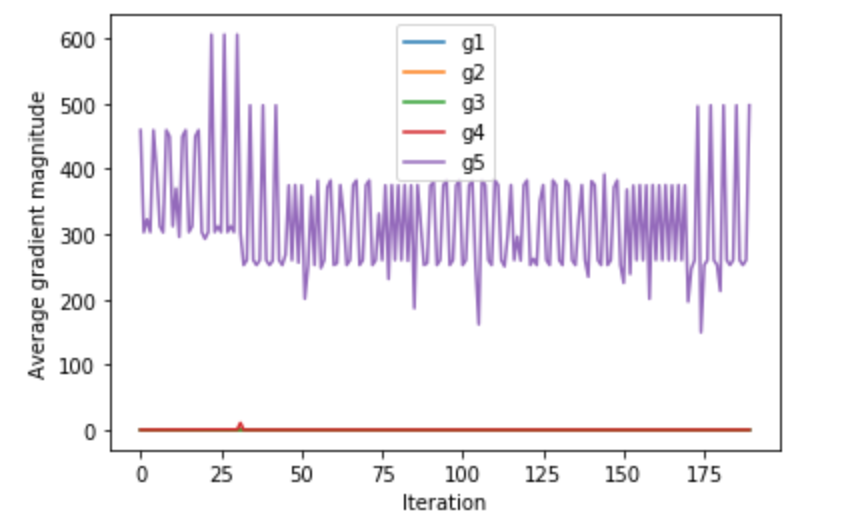

In [3]:
# To test our model, we visualized the gradients when using 5 layers.
Image(filename = "/Users/xuechenli/Downloads/lessons/7324/lab4/5layer.png" )

# Compared to sklearn 

In [122]:
from sklearn.neural_network import MLPClassifier
def mlp_sk(activation,max_iter):
    mlp=MLPClassifier(activation=activation, 
                  alpha=0.01, 
                  solver='lbfgs',
                  early_stopping=False,
                  hidden_layer_sizes=30,
                  max_iter=max_iter,
                  random_state=1,
                  shuffle=True,)
    return mlp

In [123]:
active=['identity', 'logistic']
max_iter=200

for activation in active:
    
    sk_mlp = mlp_sk(activation,max_iter)
    sk_mlp.fit(X_train_all, y_train_all)
    sk_yhat = sk_mlp.predict(X_test_all)
    sk_f1=f1_score(sk_yhat, y_test_all, average='weighted')
    print('activation:', activation,
          'Scikit-Learn f1_score:', sk_f1)

activation: identity Scikit-Learn f1_score: 0.77058911831457
activation: logistic Scikit-Learn f1_score: 0.6641074856046064


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Compared with scikit-learn, we have similar f1 score, which indicates that our model is correct.

# Conclusion

In this lab, we builded  MLP model based on Chest images data set. We used f1 score as the evaluation criteria and implemented 10 fold stratified cross validation. Our model's performance is constant with scikit-learn. 